In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from models.networks.Attention_unet import AttentionUnet

In [3]:
from models.layers.grid_attention import *

In [4]:
from transforms.augmentations import *

In [5]:
sample=np.load('/mnt/43e5e0ce-4877-4cb7-9293-17b386c78736/attention_unet/data/Only_gaussian/param_fbh_gaussian_size5mm_depth10pct_thickness3mm.npz')
x=sample['data']
y=sample['mask']

x=torch.from_numpy(x).to(torch.float64)
y=torch.from_numpy(y).to(torch.uint8)

x=x.unsqueeze(0)
y=y.unsqueeze(0)

In [6]:
transforms=[
    RandomPhaseAwareSpeedChange(),
    RandomBrightnessContrast(),
    PrependFirstFrame(),
    RandomFlip3D(axes=(1,2)),
    RandomElasticTransform(),
    RandomSequenceRotation(),
    RandomCropSequence(),
    AddGaussianNoise3D(),
    NormalizeTo01()
]     

In [7]:
modification=Compose3D(transforms=transforms)
x,y=modification(x,y)

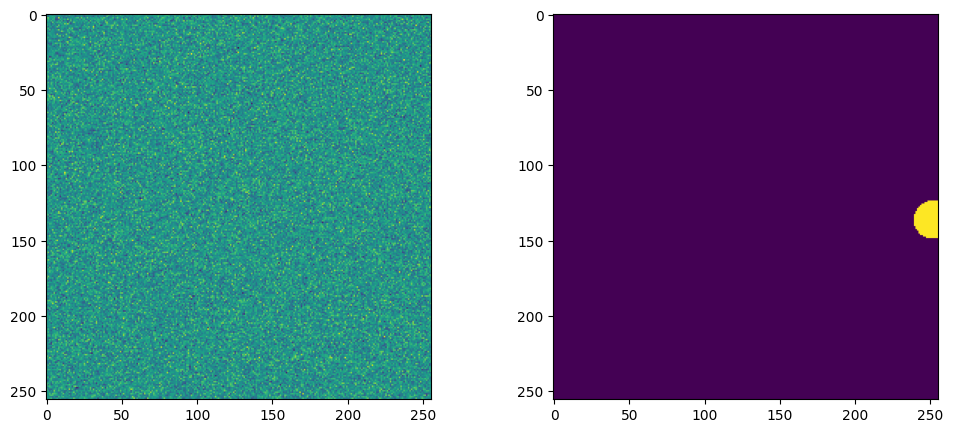

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(x[0,50,:,:])
plt.subplot(1,2,2)
plt.imshow(y[0,:,:])

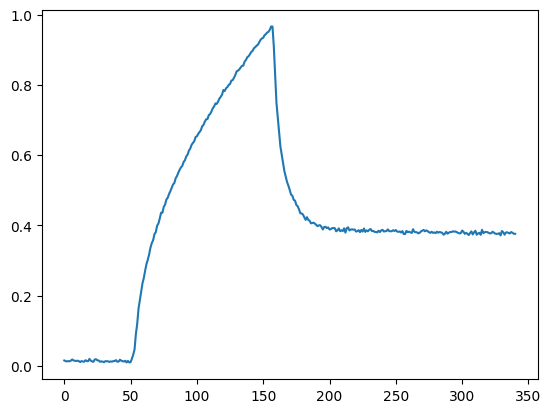

In [9]:
plt.plot(x[0,:,130,130])

In [10]:
conv=ConvBlock(1,64)

In [11]:
x.size()

torch.Size([1, 341, 256, 256])

In [12]:
out_1=conv(x)

ValueError: expected 5D input (got 4D input)